In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [2]:
df = pd.read_csv('../input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.shape

(2200, 8)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


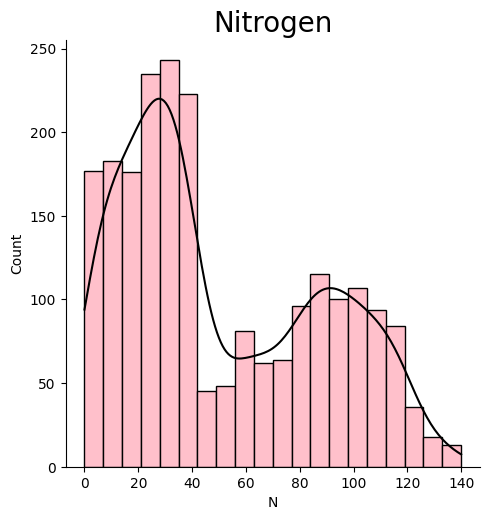

In [10]:
sns.displot(x=df['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='pink')
plt.title("Nitrogen",size=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


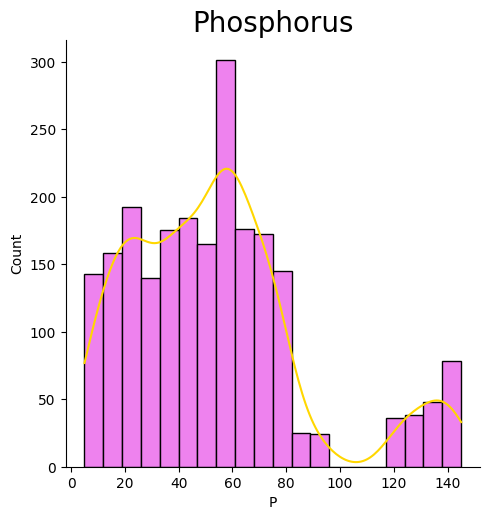

In [16]:
sns.displot(x=df['P'],bins=20,color='gold',edgecolor='black',kde=True,facecolor='violet')
plt.title("Phosphorus", size=20)
plt.xticks(range(0,150,20))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


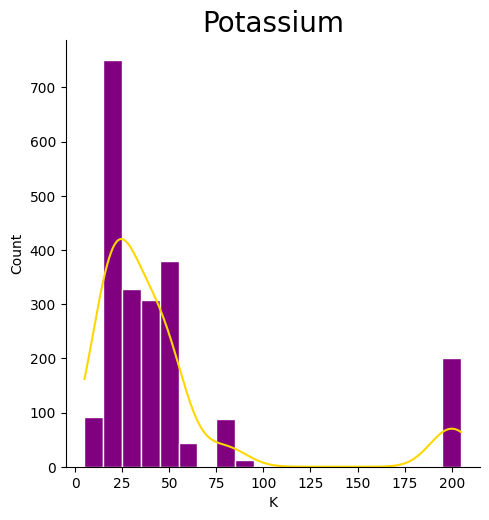

In [15]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='purple',edgecolor='white', color='gold')
plt.title("Potassium",size=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


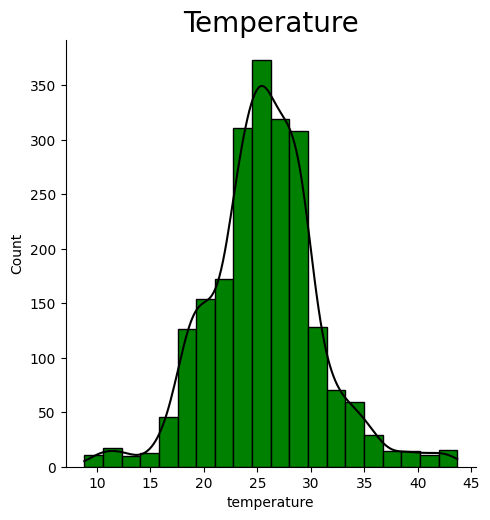

In [17]:
sns.displot(x=df['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='green')
plt.title("Temperature",size=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


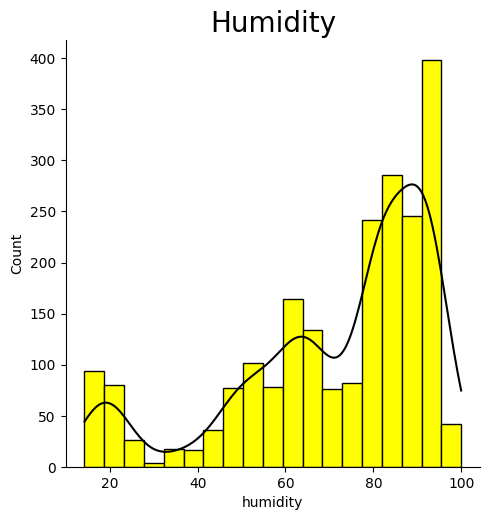

In [18]:
sns.displot(x=df['humidity'], color='black',facecolor='yellow',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


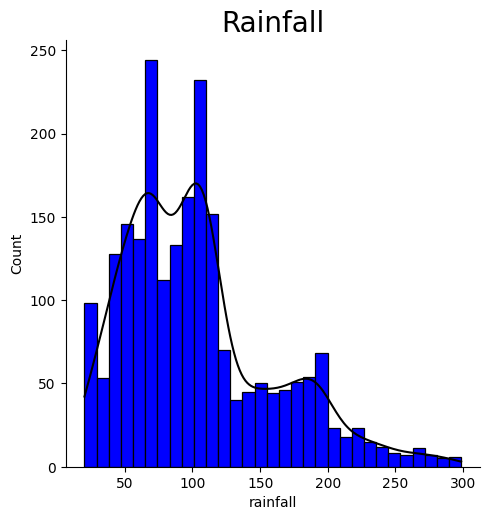

In [23]:
sns.displot(x=df['rainfall'], color='black',facecolor='blue',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()

In [30]:

crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


/tmp/ipykernel_33/1039640078.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['label']))


In [31]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(df[df['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


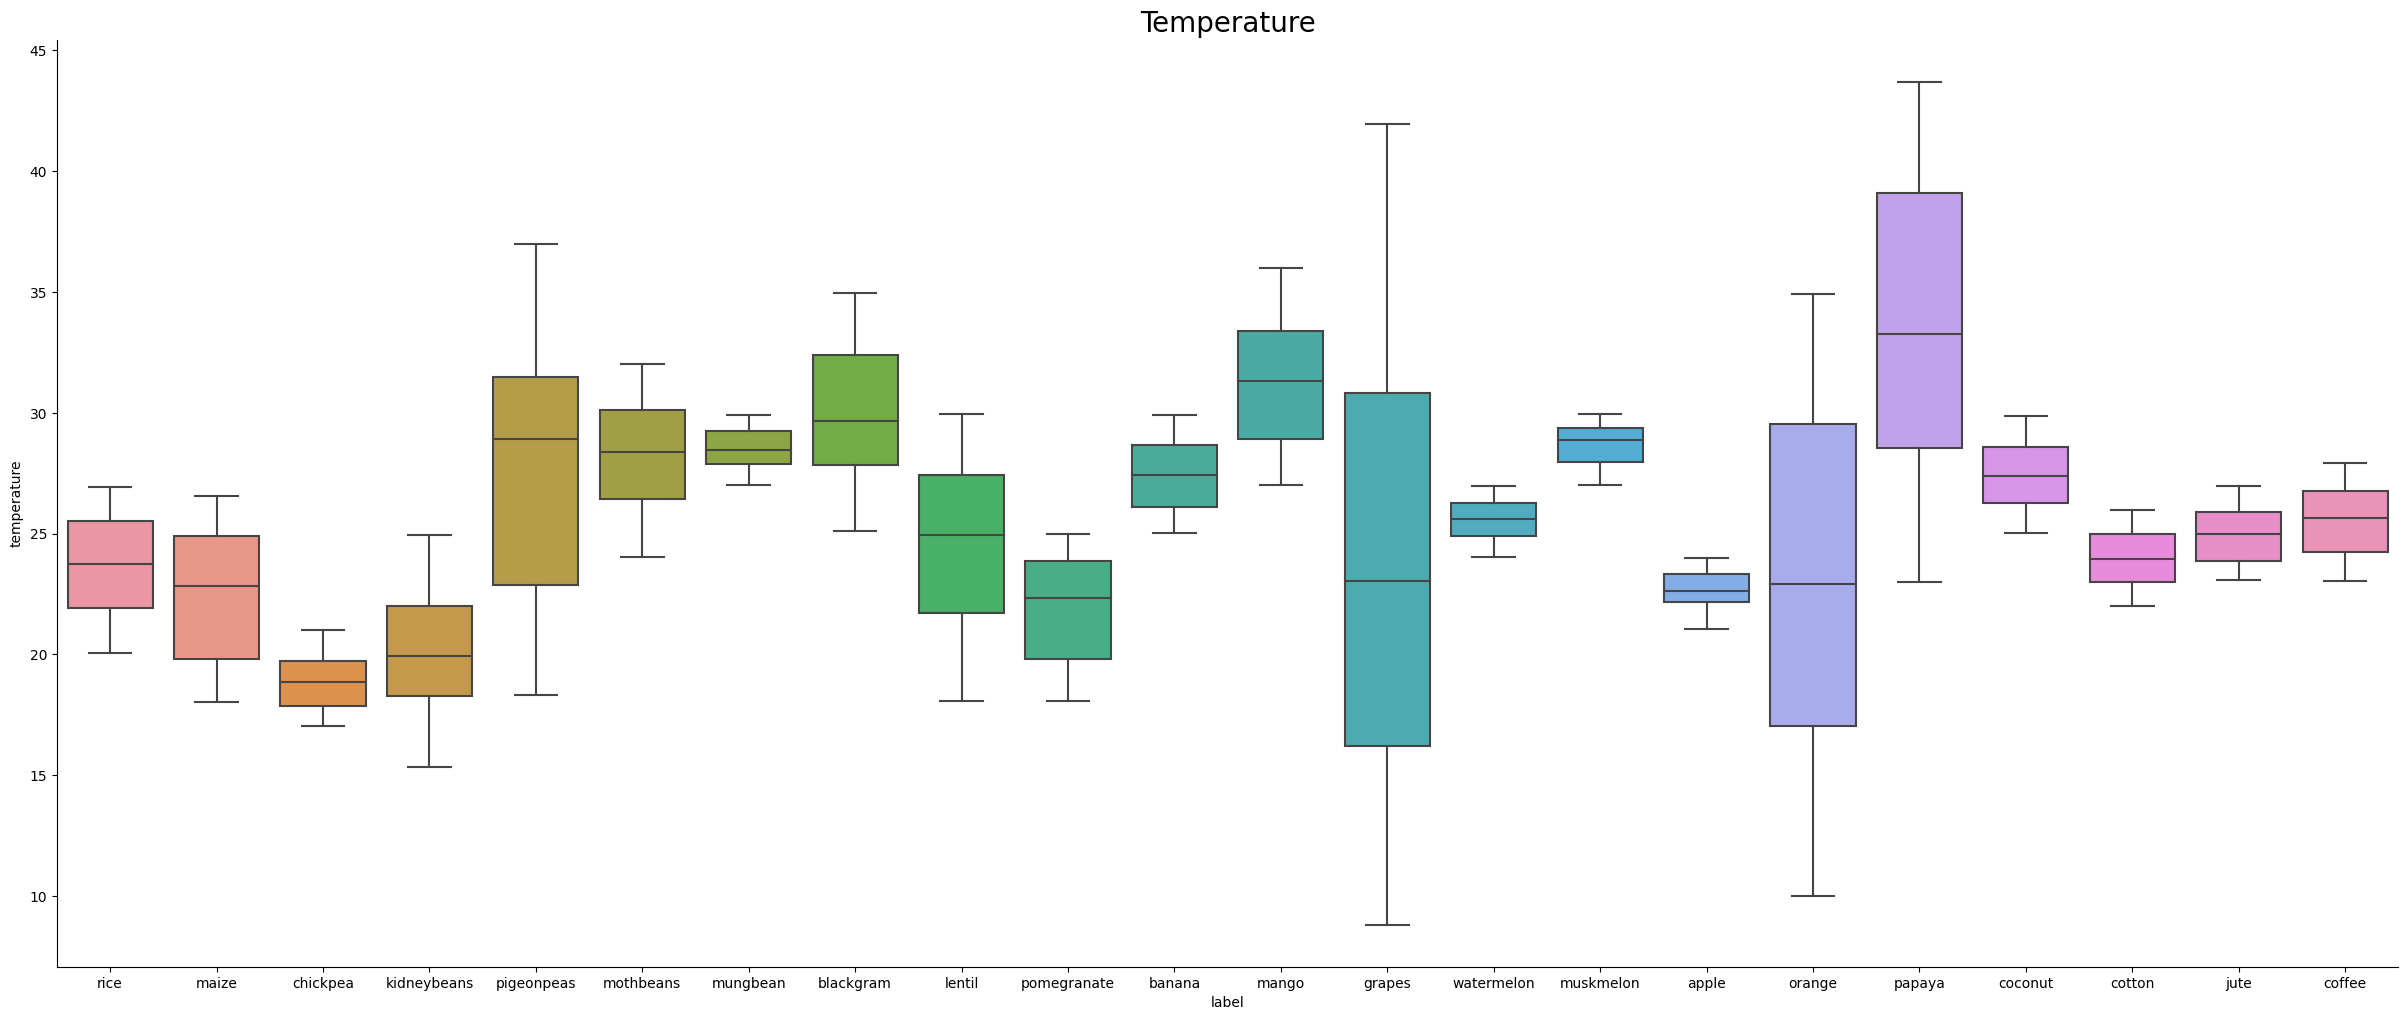

In [32]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

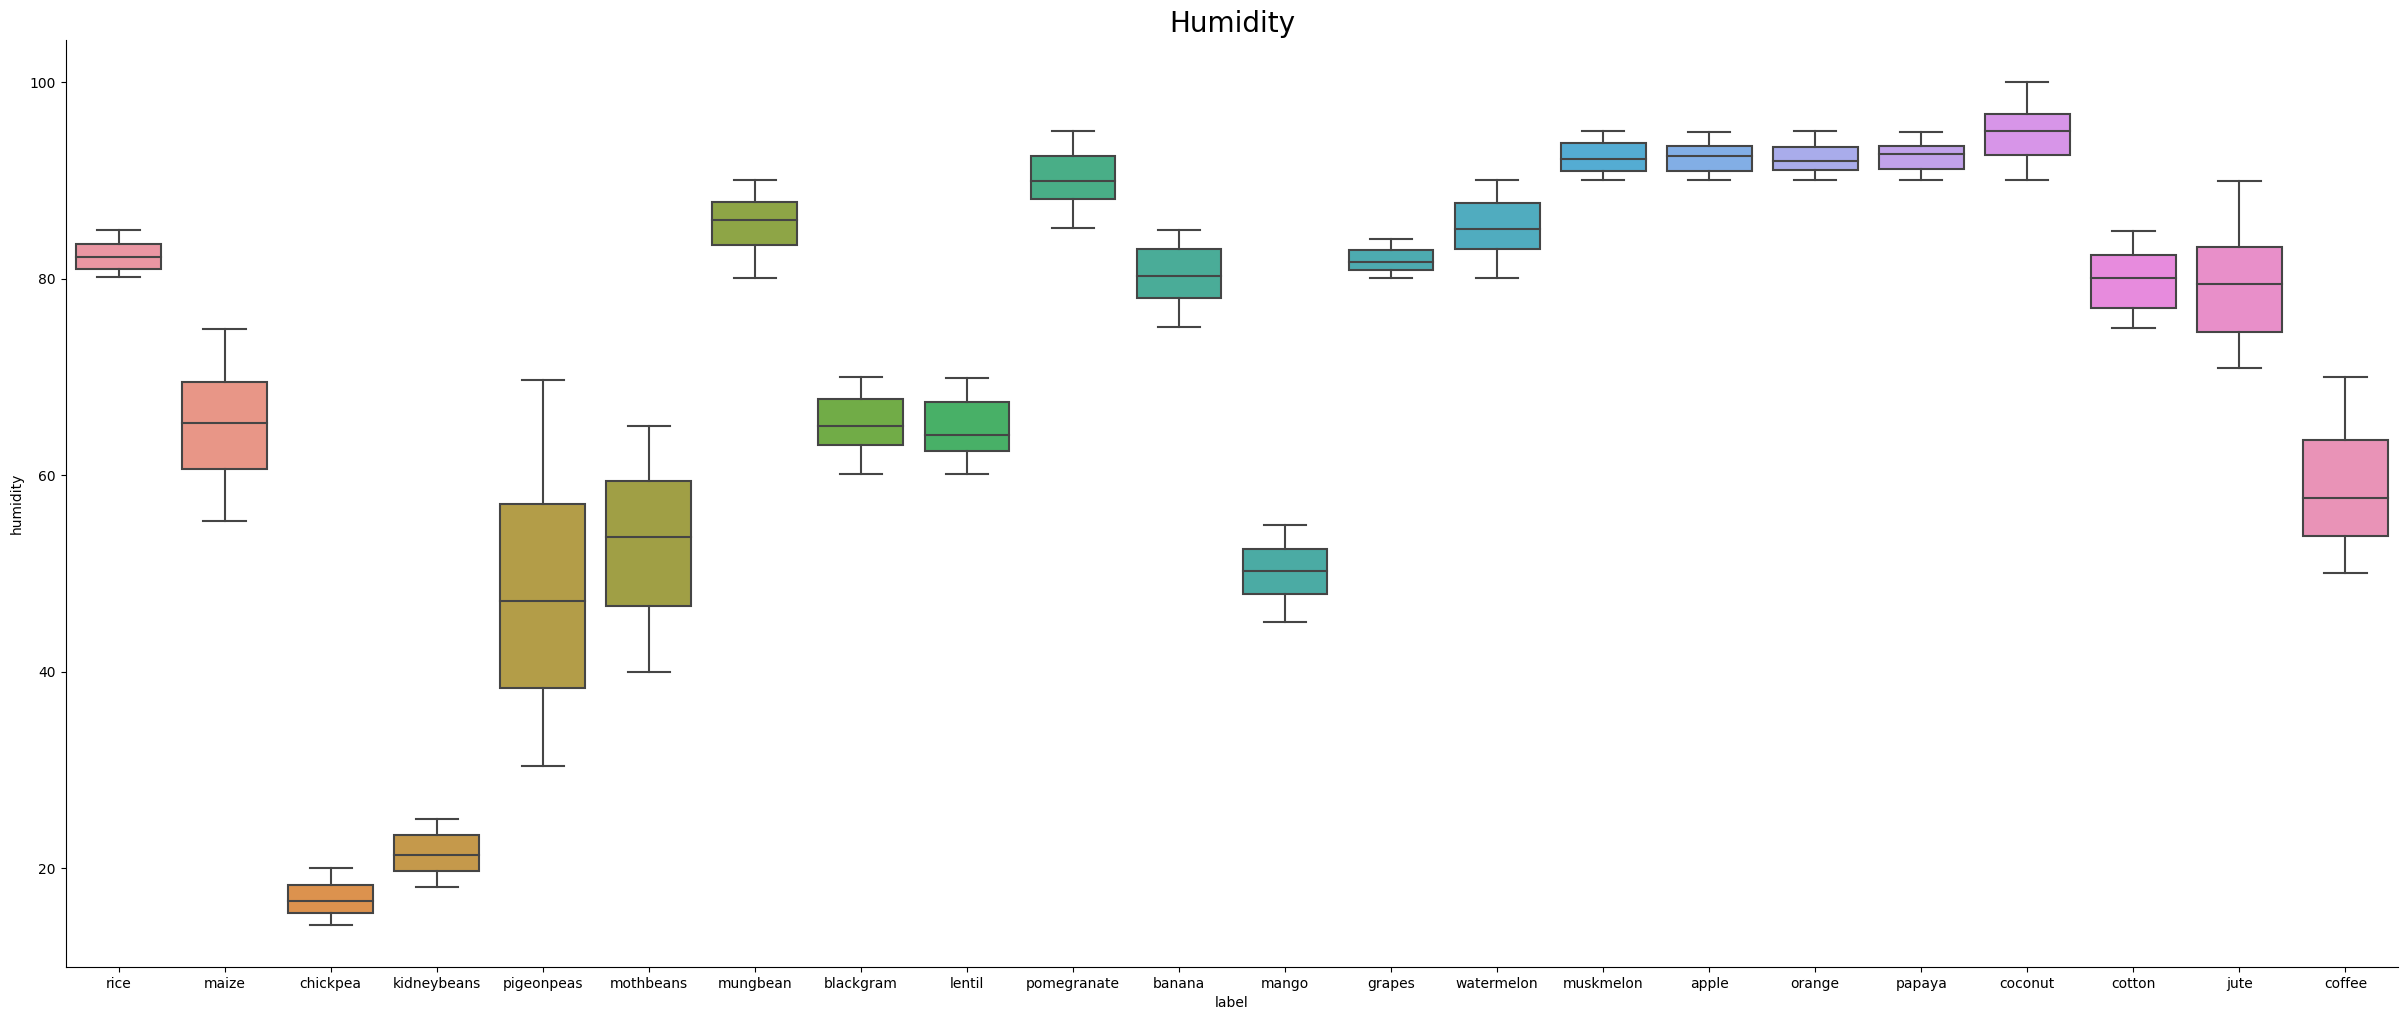

In [33]:
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

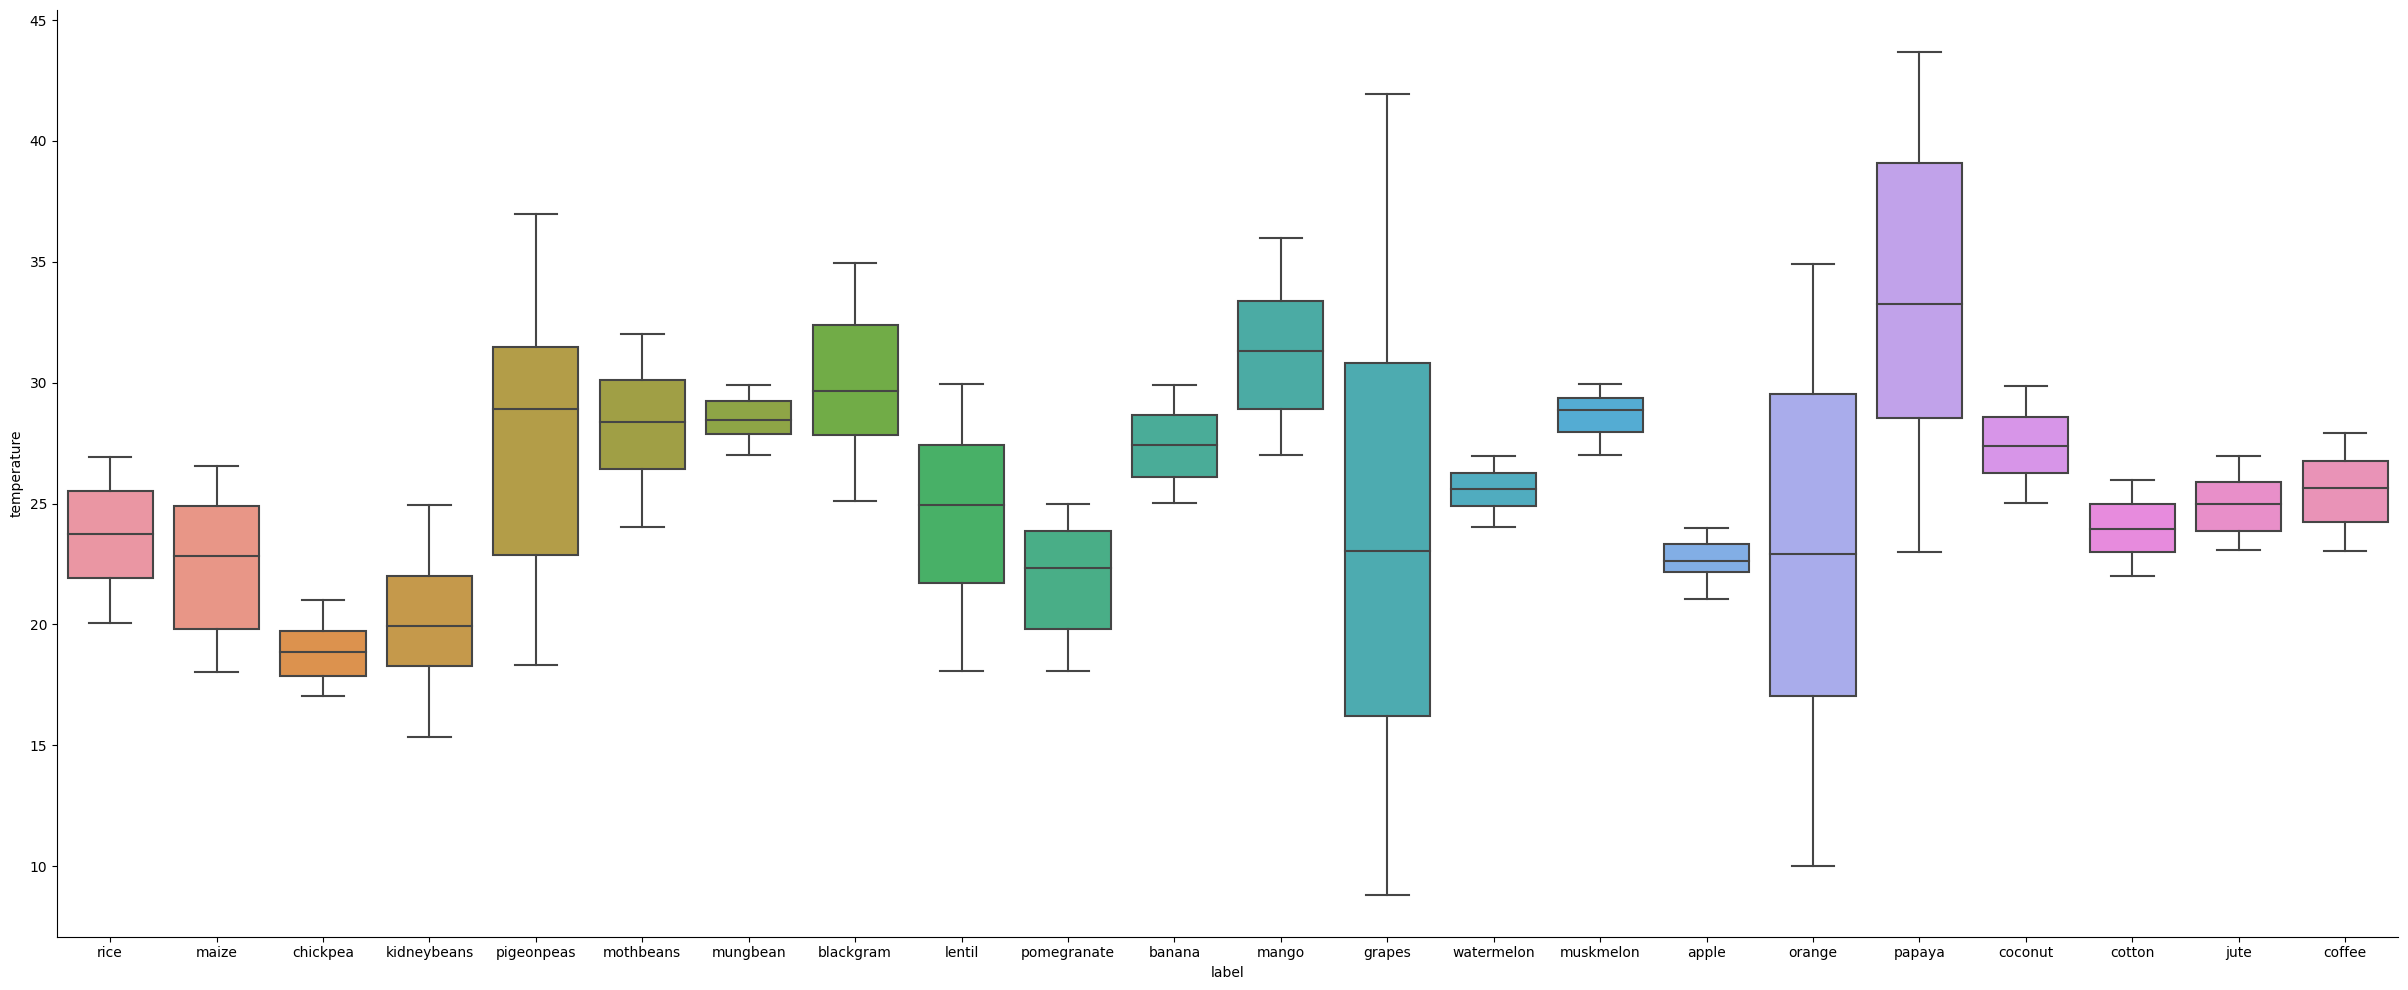

In [34]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
plt.show()

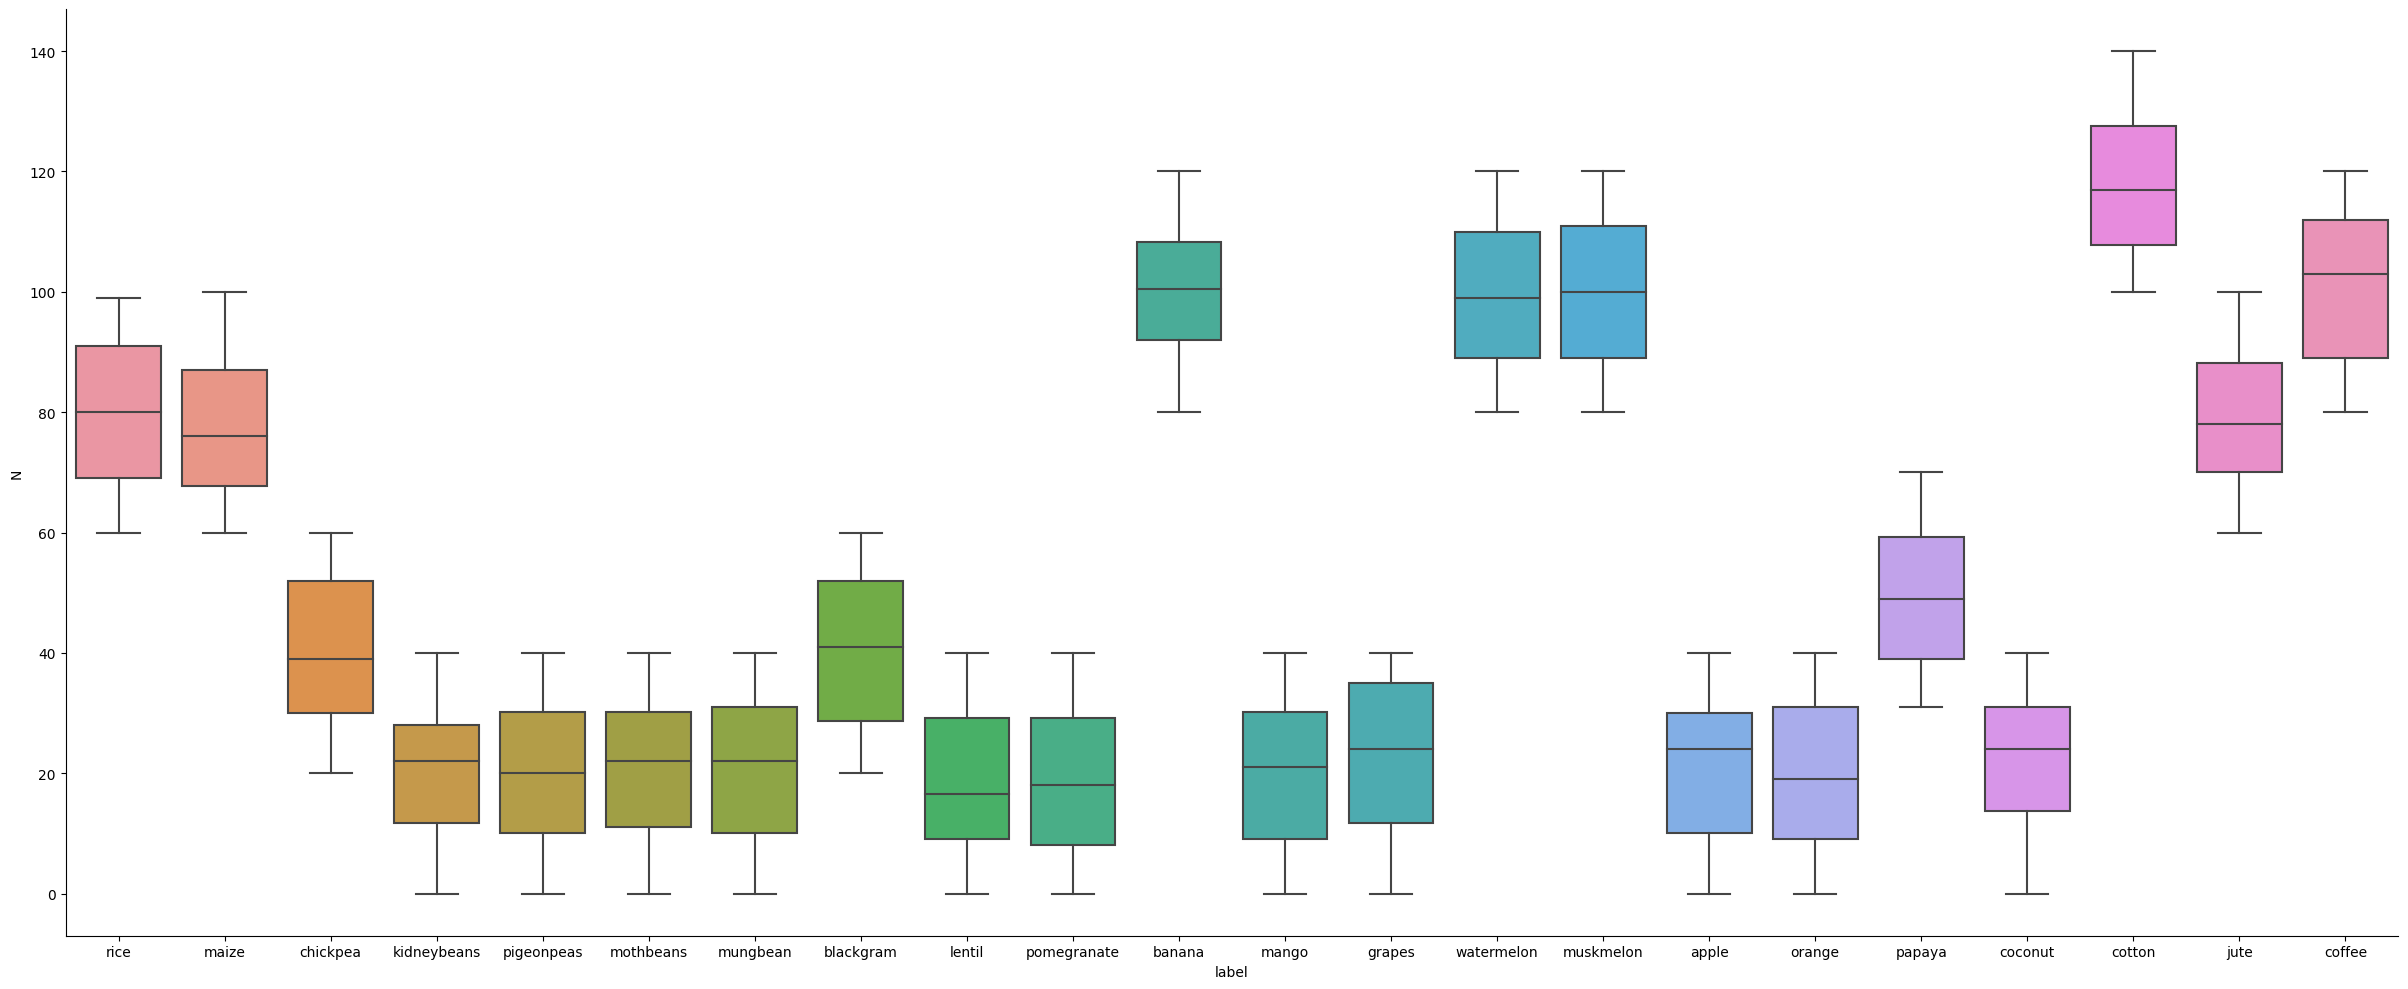

In [35]:
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.show()

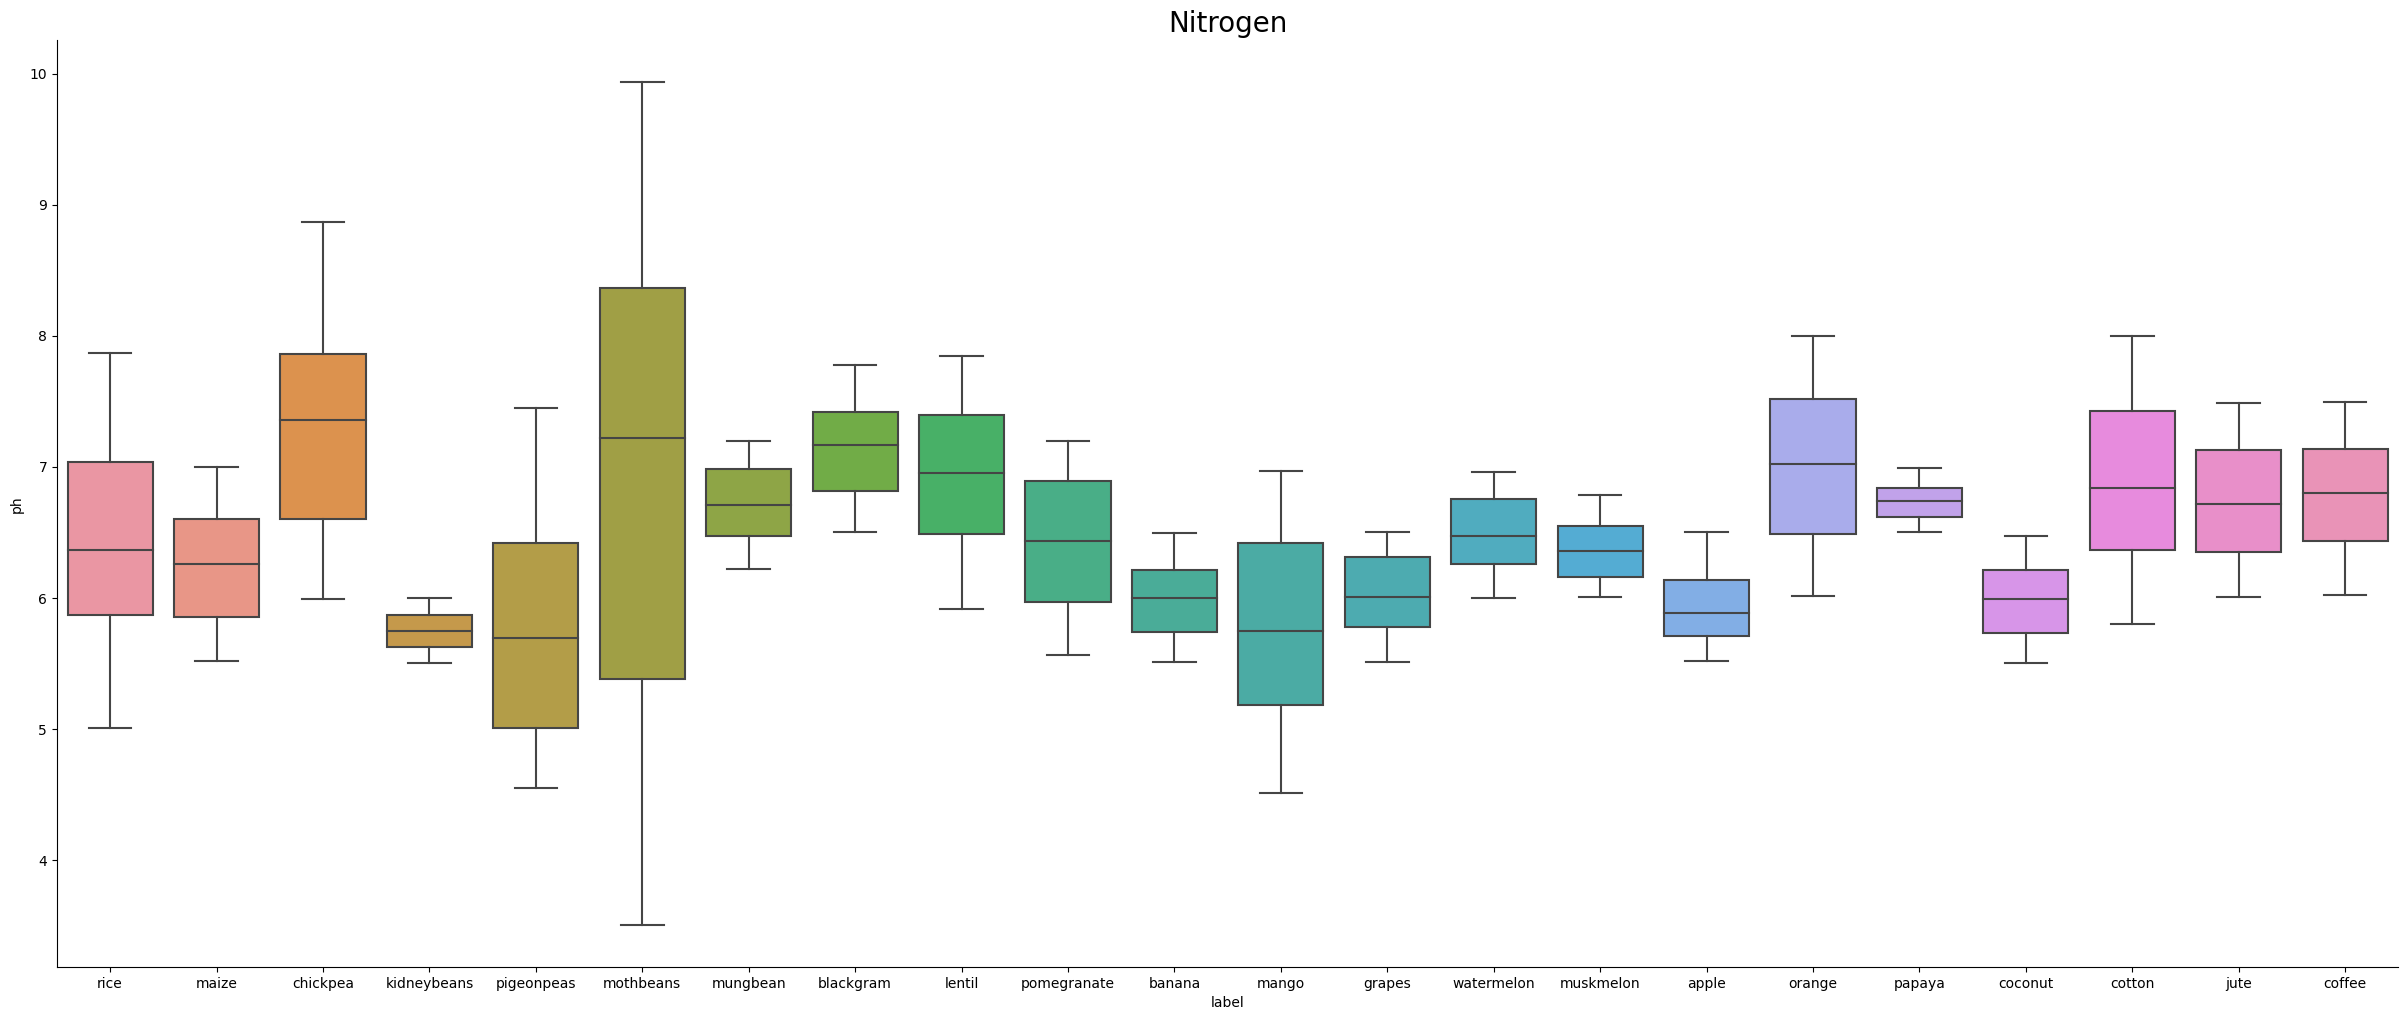

In [36]:
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Nitrogen",size=20)
plt.show()

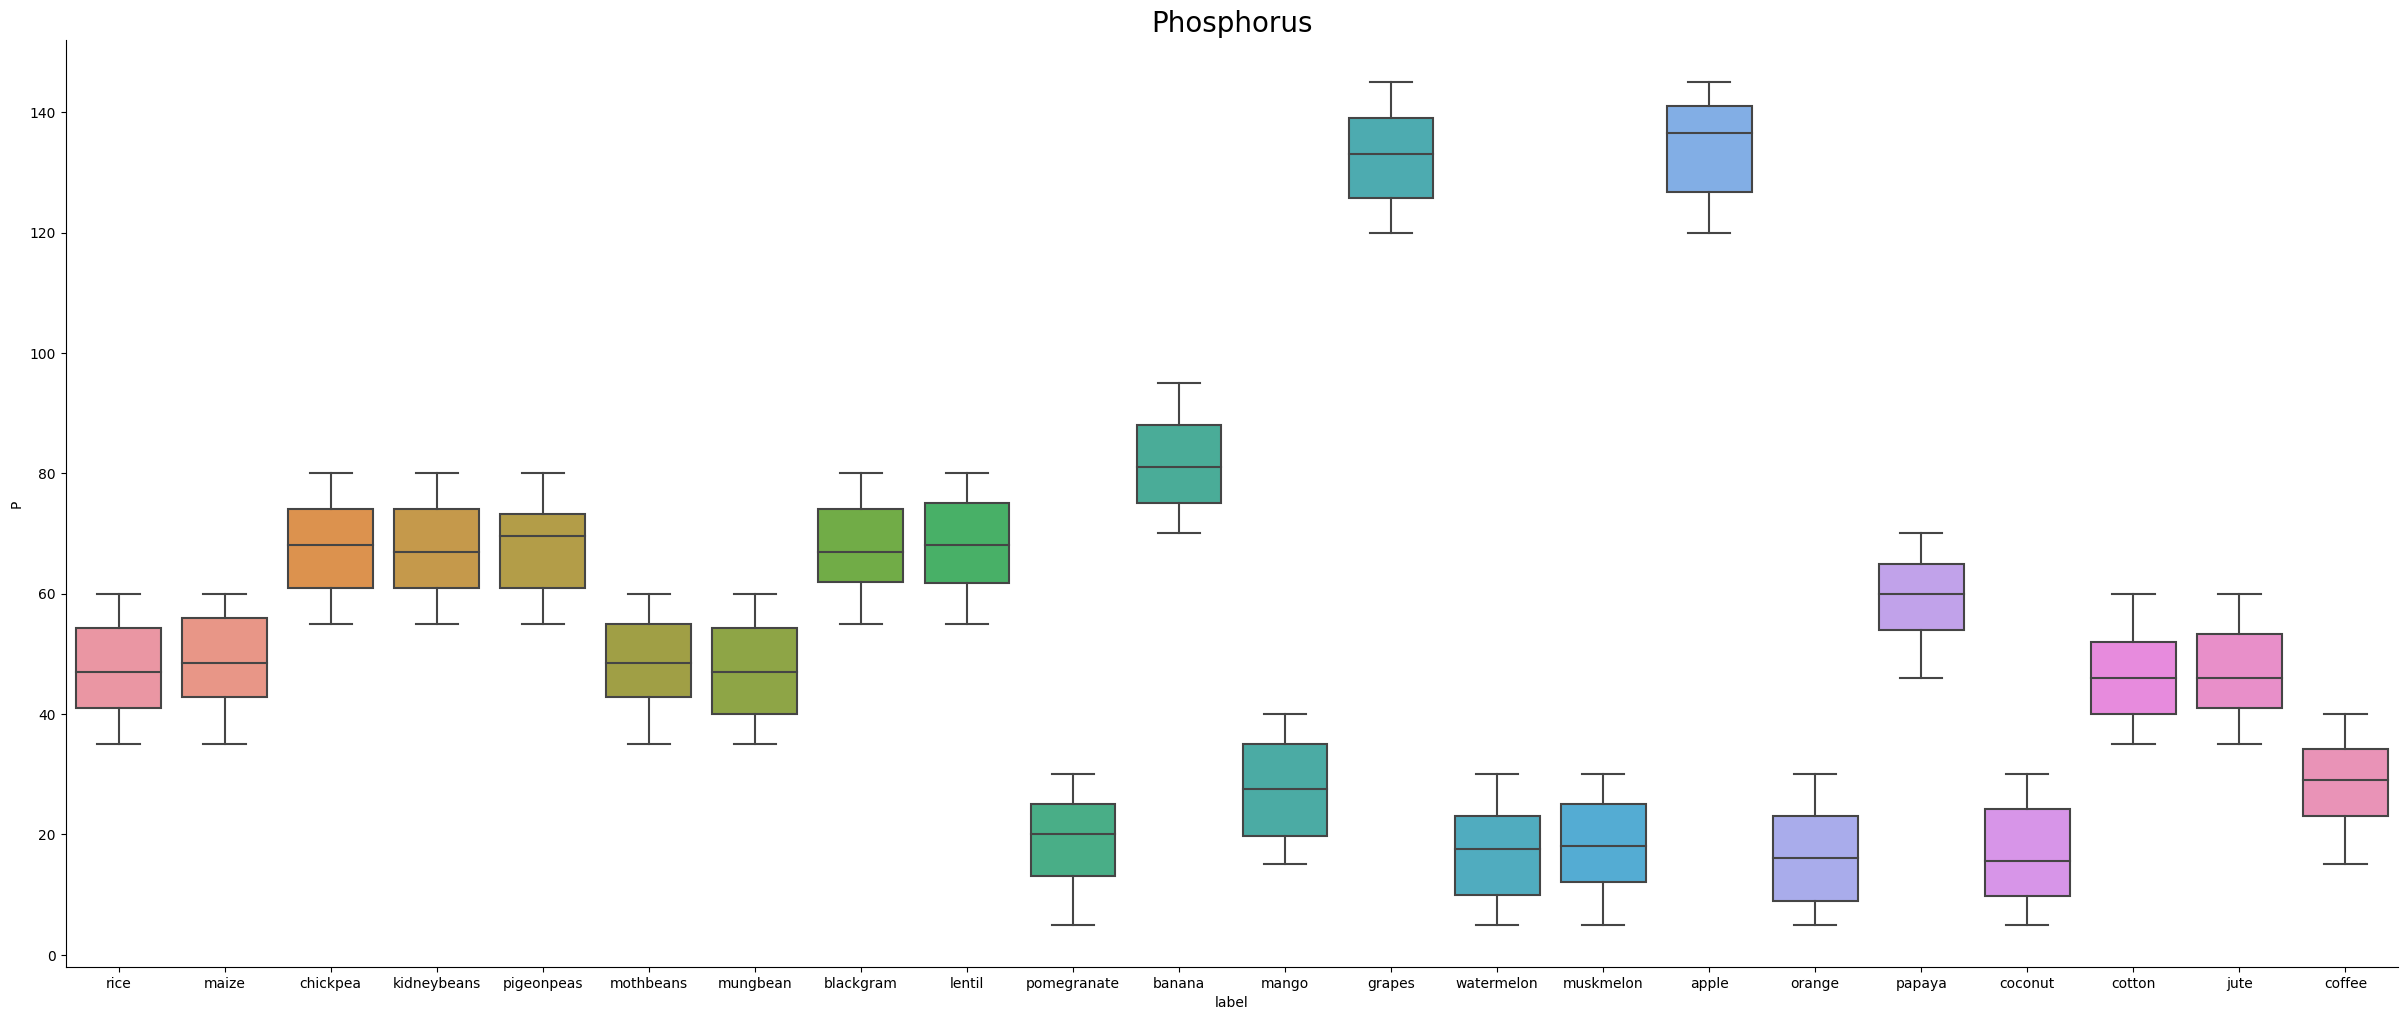

In [37]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

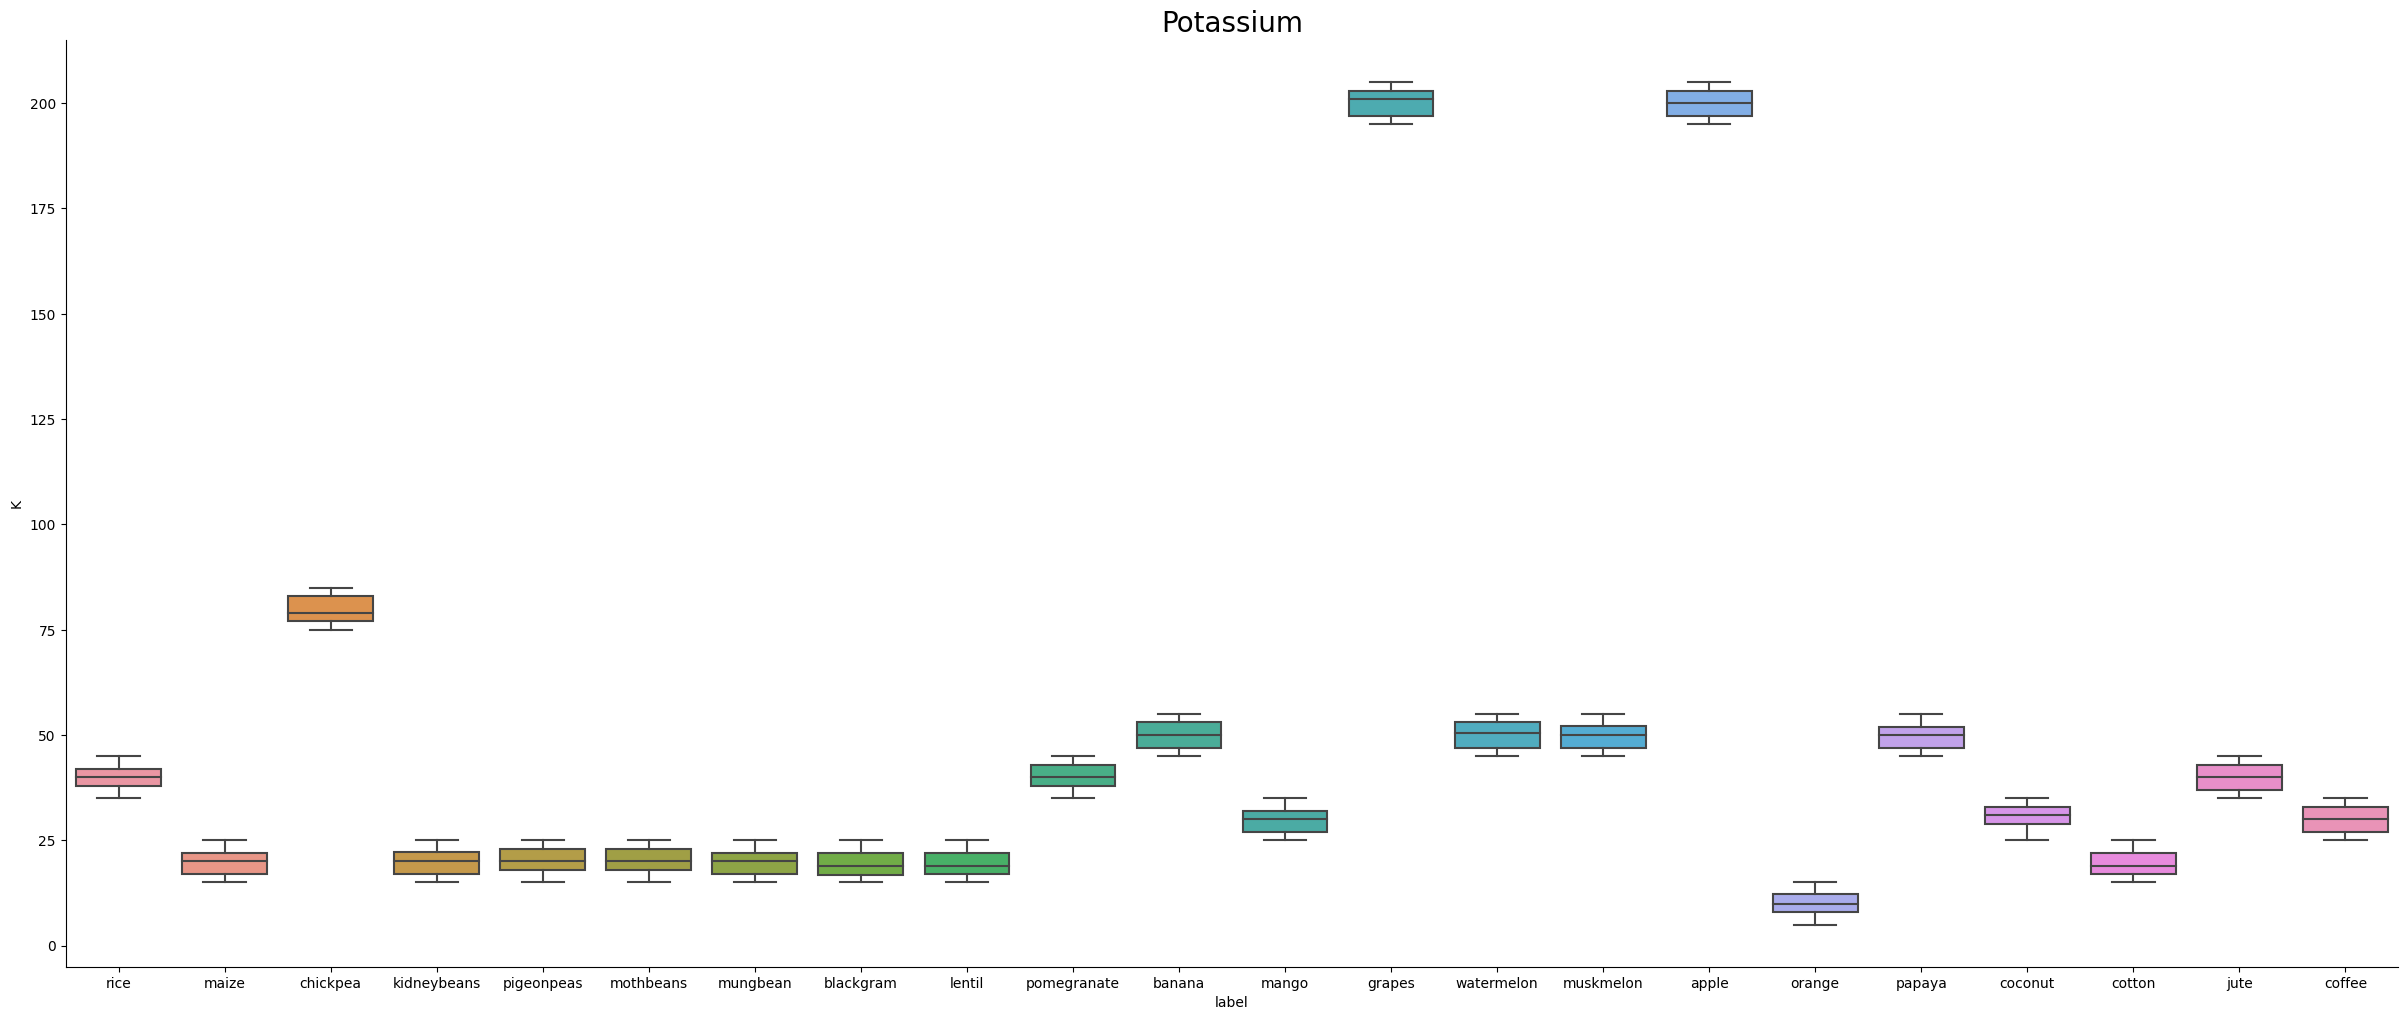

In [38]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

In [39]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df['K'][df['label']=='grapes'])

Lower limit: 188.0 Upper limit: 212.0
Minimum value: 195   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [40]:
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

In [41]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [42]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [43]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


In [44]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

a = {
    'decision_tree': {
        'model': DecisionTreeClassifier(criterion='gini'),
        'params': {'decisiontreeclassifier__splitter': ['best', 'random']}
    },
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'k_classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [5, 10, 20, 25],
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    },
    'xgboost': {
        'model': xgb.XGBClassifier(),
        'params': {
            'xgbclassifier__n_estimators': [50, 100, 150],
            'xgbclassifier__learning_rate': [0.05, 0.1, 0.2],
            'xgbclassifier__max_depth': [3, 4, 5]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'gradientboostingclassifier__n_estimators': [50, 100, 150],
            'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
            'gradientboostingclassifier__max_depth': [3, 4, 5]
        }
    },
    'adaboost': {
        'model': AdaBoostClassifier(),
        'params': {
            'adaboostclassifier__n_estimators': [50, 100, 150],
            'adaboostclassifier__learning_rate': [0.05, 0.1, 0.2]
        }
    }
}


In [45]:
score=[]
details = []
best_param = {}
for mdl,par in a.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par['model'])
    res = model_selection.GridSearchCV(pipe,par['params'],cv=5)
    res.fit(x_train,y_train)
    score.append({
        'Model name':mdl,
        'Best score':res.best_score_,
        'Best param':res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision_tree,0.983636,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.986061,"{'svc__C': 1, 'svc__kernel': 'linear'}"
2,random_forest,0.992121,{'randomforestclassifier__n_estimators': 10}
3,k_classifier,0.971515,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."
4,xgboost,0.986667,"{'xgbclassifier__learning_rate': 0.2, 'xgbclas..."
5,gradient_boosting,0.985455,{'gradientboostingclassifier__learning_rate': ...
6,adaboost,0.848485,"{'adaboostclassifier__learning_rate': 0.2, 'ad..."


In [46]:
details[0]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014314,0.001551,0.003066,0.000131,best,{'decisiontreeclassifier__splitter': 'best'},0.984848,0.984848,0.981818,0.975758,0.990909,0.983636,0.004924,1
1,0.005998,0.000681,0.002203,0.000143,random,{'decisiontreeclassifier__splitter': 'random'},0.969697,0.945455,0.945455,0.945455,0.972727,0.955758,0.012655,2


In [47]:
details[1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.197379,0.007217,0.023476,0.000228,1,rbf,"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.984848,0.984848,0.987879,0.987879,0.966667,0.982424,0.007994,6
1,0.111753,0.000895,0.011629,0.000117,1,linear,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.990909,0.987879,0.990909,0.981818,0.978788,0.986061,0.004924,1
2,0.172562,0.001610,0.017426,0.000173,10,rbf,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.984848,0.993939,0.984848,0.984848,0.975758,0.984848,0.005750,3
3,0.113427,0.001505,0.009951,0.000147,10,linear,"{'svc__C': 10, 'svc__kernel': 'linear'}",0.993939,0.981818,0.987879,0.981818,0.984848,0.986061,0.004535,2
4,0.173132,0.001784,0.016842,0.000233,100,rbf,"{'svc__C': 100, 'svc__kernel': 'rbf'}",0.987879,0.981818,0.987879,0.987879,0.972727,0.983636,0.005938,4
5,0.119923,0.002964,0.009797,0.000242,100,linear,"{'svc__C': 100, 'svc__kernel': 'linear'}",0.990909,0.975758,0.981818,0.981818,0.981818,0.982424,0.004848,6
6,0.175415,0.000590,0.016782,0.000344,1000,rbf,"{'svc__C': 1000, 'svc__kernel': 'rbf'}",0.972727,0.978788,0.987879,0.978788,0.969697,0.977576,0.006240,8
7,0.147671,0.015610,0.009726,0.000211,1000,linear,"{'svc__C': 1000, 'svc__kernel': 'linear'}",0.990909,0.975758,0.981818,0.984848,0.981818,0.983030,0.004924,5


In [48]:
details[2]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008088,0.000344,0.002471,0.000068,1,{'randomforestclassifier__n_estimators': 1},0.948485,0.921212,0.945455,0.906061,0.948485,0.933939,0.017291,3
1,0.021638,0.000293,0.003140,0.000072,5,{'randomforestclassifier__n_estimators': 5},0.978788,0.993939,0.993939,0.978788,0.981818,0.985455,0.007016,2
2,0.038476,0.000256,0.003742,0.000136,10,{'randomforestclassifier__n_estimators': 10},0.990909,0.990909,0.996970,0.987879,0.993939,0.992121,0.003090,1


In [49]:
details[3]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005218,0.000118,0.020519,0.000220,5,uniform,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.972727,0.954545,0.975758,0.969697,0.957576,0.966061,0.008441,2
1,0.005112,0.000143,0.005864,0.000114,5,distance,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.972727,0.963636,0.984848,0.972727,0.963636,0.971515,0.007809,1
2,0.005283,0.000132,0.021474,0.000375,10,uniform,"{'kneighborsclassifier__n_neighbors': 10, 'kne...",0.942424,0.930303,0.963636,0.954545,0.945455,0.947273,0.011273,5
3,0.005202,0.000210,0.006827,0.000065,10,distance,"{'kneighborsclassifier__n_neighbors': 10, 'kne...",0.960606,0.945455,0.978788,0.960606,0.957576,0.960606,0.010671,3
4,0.005261,0.000100,0.023013,0.000186,20,uniform,"{'kneighborsclassifier__n_neighbors': 20, 'kne...",0.936364,0.906061,0.954545,0.933333,0.930303,0.932121,0.015523,7
5,0.005405,0.000626,0.008280,0.000136,20,distance,"{'kneighborsclassifier__n_neighbors': 20, 'kne...",0.954545,0.924242,0.972727,0.951515,0.945455,0.949697,0.015641,4
6,0.005459,0.000364,0.023728,0.000348,25,uniform,"{'kneighborsclassifier__n_neighbors': 25, 'kne...",0.924242,0.900000,0.948485,0.930303,0.921212,0.924848,0.015617,8
7,0.005302,0.000556,0.008879,0.000133,25,distance,"{'kneighborsclassifier__n_neighbors': 25, 'kne...",0.939394,0.909091,0.969697,0.939394,0.936364,0.938788,0.019204,6


In [50]:
score

[{'Model name': 'decision_tree',
  'Best score': 0.9836363636363636,
  'Best param': {'decisiontreeclassifier__splitter': 'best'}},
 {'Model name': 'svm',
  'Best score': 0.9860606060606061,
  'Best param': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'Model name': 'random_forest',
  'Best score': 0.9921212121212122,
  'Best param': {'randomforestclassifier__n_estimators': 10}},
 {'Model name': 'k_classifier',
  'Best score': 0.9715151515151514,
  'Best param': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'}},
 {'Model name': 'xgboost',
  'Best score': 0.9866666666666667,
  'Best param': {'xgbclassifier__learning_rate': 0.2,
   'xgbclassifier__max_depth': 3,
   'xgbclassifier__n_estimators': 50}},
 {'Model name': 'gradient_boosting',
  'Best score': 0.9854545454545456,
  'Best param': {'gradientboostingclassifier__learning_rate': 0.1,
   'gradientboostingclassifier__max_depth': 3,
   'gradientboostingclassifier__n_estimators': 50}},
 {'Model name'

In [51]:
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision_tree,0.983636,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.986061,"{'svc__C': 1, 'svc__kernel': 'linear'}"
2,random_forest,0.992121,{'randomforestclassifier__n_estimators': 10}
3,k_classifier,0.971515,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."
4,xgboost,0.986667,"{'xgbclassifier__learning_rate': 0.2, 'xgbclas..."
5,gradient_boosting,0.985455,{'gradientboostingclassifier__learning_rate': ...
6,adaboost,0.848485,"{'adaboostclassifier__learning_rate': 0.2, 'ad..."


In [52]:
for i in best_param.keys():
    print(f'{i} : {best_param[i].score(x_test,y_test)}')

decision_tree : 0.9963636363636363
svm : 0.9854545454545455
random_forest : 0.9981818181818182
k_classifier : 0.9781818181818182
xgboost : 0.9981818181818182
gradient_boosting : 0.9927272727272727
adaboost : 0.8927272727272727


In [53]:
predicted = best_param['random_forest'].predict(x_test)


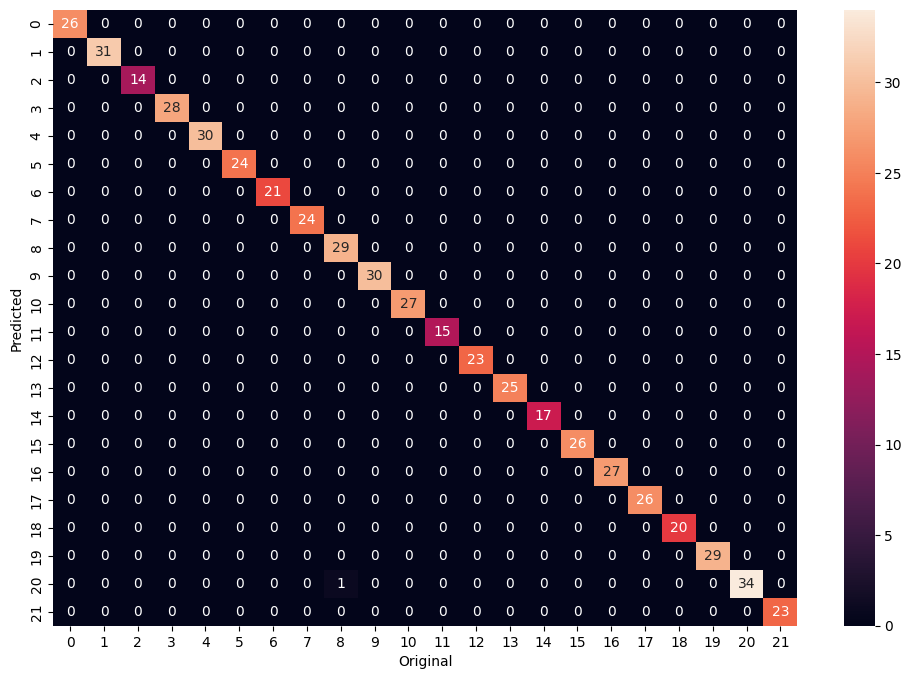

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [55]:
pipe1 = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators = 10))
bag_model = BaggingClassifier(base_estimator=pipe1,n_estimators=100,
                              oob_score=True,random_state=0,max_samples=0.8)

In [56]:
bag_model.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('randomforestclassifier',
                                                  RandomForestClassifier(n_estimators=10))]),
                  max_samples=0.8, n_estimators=100, oob_score=True,
                  random_state=0)

In [57]:
bag_model.score(x_test,y_test)

0.9963636363636363

In [58]:
predict = bag_model.predict(x_test)

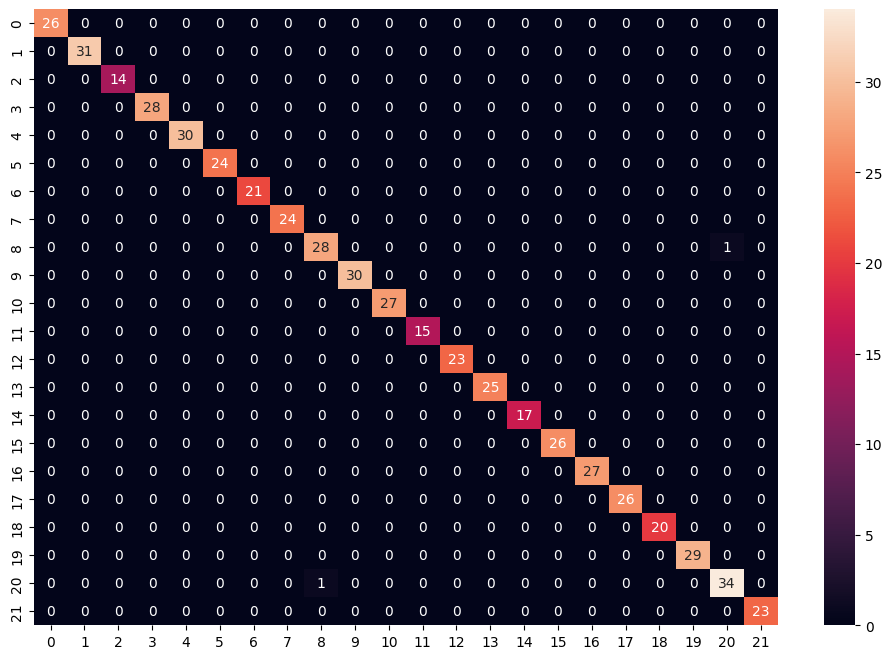

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.show()

In [60]:
dha2 =pd.DataFrame(Y)
code = pd.DataFrame(dha2['label'].unique())

In [61]:
dha = pd.DataFrame(y)
encode = pd.DataFrame(dha[0].unique())
refer = pd.DataFrame()
refer['code']=code
refer['encode']=encode
refer

,code,encode
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


In [62]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.97      0.97      0.97        29
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        27
          17       1.00    